展示了使用`KBinsDiscretizer`将连续特征离散化的作用。  
下面的练习来自sklearn的官网文档[Using KBinsDiscretizer to discretize continuous features](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization.html)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor

In [16]:
# construct the dataset
rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3
# X = X.reshape(-1, 1)

In [23]:
data = np.vstack((X,y)).T
data.shape

(100, 2)

In [24]:
data = pd.DataFrame(data, columns=['x','y'])

In [25]:
data.head()

,x,y
0,-0.752759,-0.654639
1,2.704286,0.323832
2,1.391964,1.014639
3,0.591951,-0.104542
4,-2.063888,-0.954098


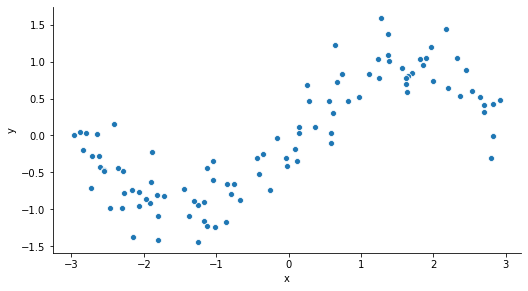

In [36]:
g = sns.relplot(data=data, x='x', y='y')
g.fig.set_size_inches(8,4)

In [66]:
# transform the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=10, encode='onehot-dense')
X_binned = enc.fit_transform(X.reshape(-1,1))
X_binned.shape

(100, 10)

In [67]:
X[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [68]:
enc.bin_edges_[0]

array([-2.9668673 , -2.55299973, -2.0639171 , -1.3945301 , -1.02797432,
       -0.21514527,  0.44239288,  1.14612193,  1.63693428,  2.32784522,
        2.92132162])

In [69]:
X_binned[:5,:]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

+ 使用原始数据建模

In [70]:
# predict with original dataset
X = X.reshape(-1,1)

lr = LinearRegression().fit(X, y)
dtr = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X, y)

+ 使用分箱后的数据建模

In [71]:
# predict with transformed dataset
lr_bin = LinearRegression().fit(X_binned, y)
dtr_bin = DecisionTreeRegressor(min_samples_split=3,random_state=0).fit(X_binned, y)

+ 绘图

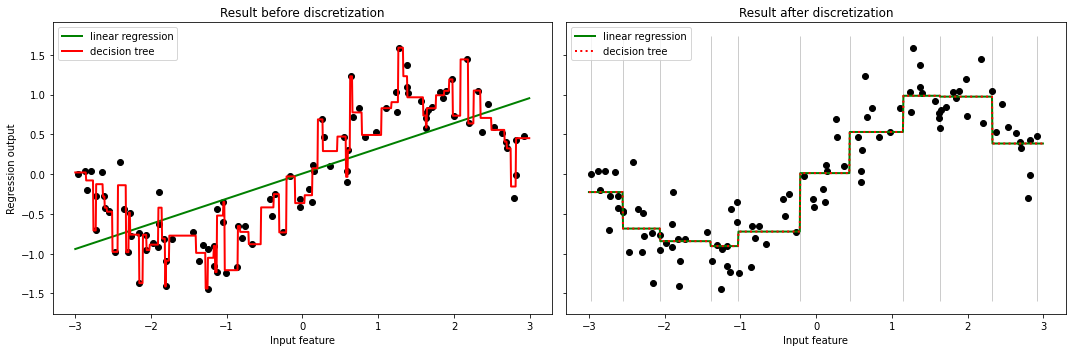

In [73]:
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_binned = enc.transform(line)

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15, 5))

ax1.plot(X[:, 0], y, 'o', c='k')
ax1.plot(line, lr.predict(line), linewidth=2, color='green',
         label="linear regression")
ax1.plot(line, dtr.predict(line), linewidth=2, color='red',
         label="decision tree")
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")


ax2.plot(X[:, 0], y, 'o', c='k')
ax2.plot(line, lr_bin.predict(line_binned), linewidth=2, color='green',
         linestyle='-', label='linear regression')
ax2.plot(line, dtr_bin.predict(line_binned), linewidth=2, color='red',
         linestyle=':', label='decision tree')
# 绘制分箱的线
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")

plt.tight_layout()

使用 分箱+onehot 编码的方式，相当于扩充了特征个数，在更高维度上，数据集更有可能是线性可分的。  
但是对于 分箱+ordinal 编码的方式，则不一定。

+ 换一种分箱方式

In [55]:
# transform the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=10, encode='ordinal')
X_binned = enc.fit_transform(X.reshape(-1,1))
X_binned.shape

(100, 1)

In [56]:
X[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [57]:
X_binned[:5,:]

array([[4.],
       [9.],
       [7.],
       [6.],
       [2.]])

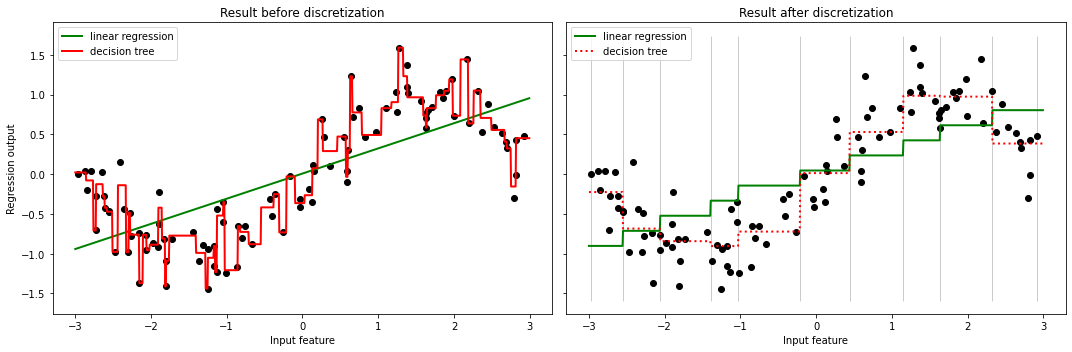

In [62]:
# predict with transformed dataset
lr_bin = LinearRegression().fit(X_binned, y)
dtr_bin = DecisionTreeRegressor(min_samples_split=3,random_state=0).fit(X_binned, y)


# 绘图
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_binned = enc.transform(line)

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15, 5))

ax1.plot(X[:, 0], y, 'o', c='k')
ax1.plot(line, lr.predict(line), linewidth=2, color='green',
         label="linear regression")
ax1.plot(line, dtr.predict(line), linewidth=2, color='red',
         label="decision tree")
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")


ax2.plot(X[:, 0], y, 'o', c='k')
ax2.plot(line, lr_bin.predict(line_binned), linewidth=2, color='green',
         linestyle='-', label='linear regression')
ax2.plot(line, dtr_bin.predict(line_binned), linewidth=2, color='red',
         linestyle=':', label='decision tree')
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")

plt.tight_layout()